In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#np.set_printoptions(threshold=sys.maxsize)
from qiskit import *
from qiskit.visualization import plot_histogram


In [4]:
def completeGraphWalk(N,qc,qreg,qcoin):
    qc.swap(qreg[0:N],qcoin)
    return qc

def hadamardCoin(N,qc,qcoin):
    qc.h(qcoin)
    return qc

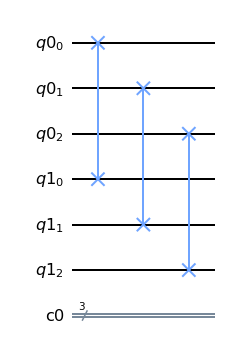

In [5]:
n=3

qreg = QuantumRegister(n)
qsub = QuantumRegister(3)
creg = ClassicalRegister(n)

circ1= QuantumCircuit(qreg,qsub,creg)

#circ1 = hadamardCoin(n,circ1,qsub)

circ1 = completeGraphWalk(n,circ1,qreg,qsub)

#circ1.measure(qreg,creg)
circ1.draw(output='mpl')

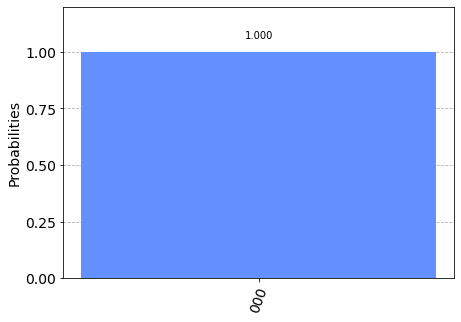

In [6]:
#circuit building
backend = Aer.get_backend('qasm_simulator')

job_sim = execute(circ1, backend=backend, shots=8192,)
#result = job.result()
result_sim = job_sim.result()
result_counts = result_sim.get_counts(circ1)
plot_histogram(result_counts)

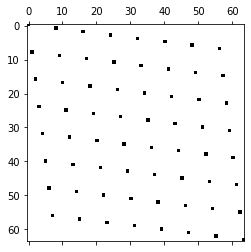

In [7]:
#circuit building
backend = Aer.get_backend('unitary_simulator')

job_sim = execute(circ1, backend=backend)
#print(job_sim.unitary())
#result = job.result()
result_sim = job_sim.result()
#print(result_sim.get_unitary())
array = result_sim.get_unitary()
plt.spy(array)

#result_counts = result_sim.get_counts(circ1)
#plot_histogram(result_counts)

# The next part is an attempt at constructing the complete graph using increments and decrements. The results are not yet conclusive.

In [8]:
%run CnotDecomp.ipynb #for importing ccx function

def incr(qwc,q,subnode,x,n):
    for j in range(-1,n-1):
        if(j==-1):
            cnx(qwc,subnode[x],*q[-1::-1])
            qwc.barrier()
        else:
            cnx(qwc,subnode[x],*q[-1:j:-1])
            qwc.barrier()
    return qwc

def decr(qwc,q,subnode,x,n):
    qwc.x(subnode[x])
    c=0
    qwc.x(q[-1:0:-1])
    for j in range(-1,n-1):
        if(j==-1):
            c+=1
            cnx(qwc,subnode[x],*q[-1::-1])
            qwc.x(q[c])
            qwc.barrier()
        else:
            c+=1
            cnx(qwc,subnode[x],*q[-1:j:-1])
            if(c==n):
                break
            qwc.x(q[c])
            qwc.barrier()
    qwc.x(subnode[x])
    return qwc

In [9]:
n=3
m=n-1

qreg1 = QuantumRegister(n)
qsub1 = QuantumRegister(2)
csub1 = ClassicalRegister(1)
creg1 = ClassicalRegister(n)

circ2= QuantumCircuit(qreg1,qsub1,creg1)

def runQWC(qwc,times):
    for i in range(0,times):
        qwc.h(qsub1[0])
        qwc.h(qsub1[1])
        qwc.barrier()
        incr(qwc,qreg1,qsub1,0,n)
        qwc.barrier()
        decr(qwc,qreg1,qsub1,0,n)
        qwc.barrier()
        qwc.x(qsub1[1])
        incr(qwc,qreg1,qsub1,1,n)
        qwc.x(qsub1[1])
        qwc.barrier()
        decr(qwc,qreg1,qsub1,1,n)
        qwc.barrier()
        qwc.measure(qreg1,creg1)
        qwc.barrier()
        
    return qwc




In [13]:
step = 1
circ2 = runQWC(circ2,step)

#circ2.draw(output='mpl')

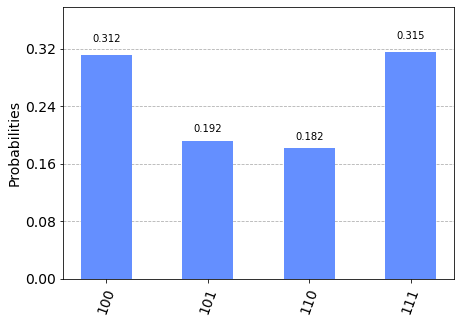

In [14]:
#circuit building
backend = Aer.get_backend('qasm_simulator')

job_sim = execute(circ2, backend=backend, shots=8192,)
#result = job.result()
result_sim = job_sim.result()
result_counts = result_sim.get_counts(circ2)
plot_histogram(result_counts)